# Analyse des données d'expérience

Expérience: J7 Energie Solaire

Date: 2023-09-30

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

## Expérience 2: Puissance max

### Amorphe

In [4]:
amorphed40 = np.loadtxt("../data/Ir(Ud),amorphe,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
amorphed70 = np.loadtxt("../data/Ir(Ud),amorphe,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)

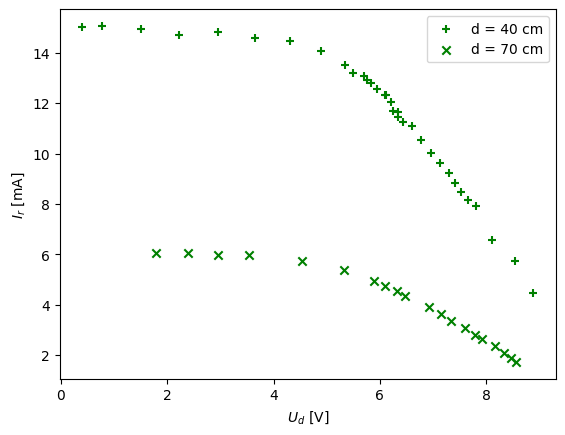

In [5]:
plt.scatter(amorphed40[:,1], amorphed40[:,2], marker="+", color=colors["A"], label="$d_1$")
plt.scatter(amorphed70[:,1], amorphed70[:,2], marker="x", color=colors["A"], label="$d_2$")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/amorpheI(U).tikz")

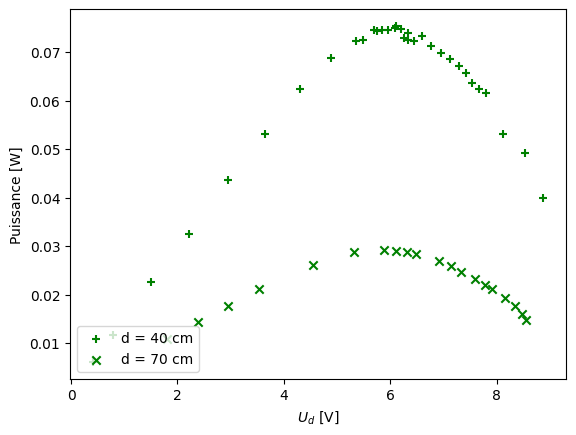

In [6]:
# Puissances
# [W] = [V] * [A]
puis_amorphed40 = amorphed40[:,1] * amorphed40[:,2] * 1e-3
puis_amorphed70 = amorphed70[:,1] * amorphed70[:,2] * 1e-3

plt.scatter(amorphed40[:,1], puis_amorphed40, marker="+", color=colors["A"], label="$d_1$")
plt.scatter(amorphed70[:,1], puis_amorphed70, marker="x", color=colors["A"], label="$d_2$")
plt.legend(loc='lower left')
# plt.title("$P(U_d)$, amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/amorpheP(U).tikz")

### Monocristallin

### Polycristallin

In [12]:
monod40 = np.loadtxt("../data/Ir(Ud),monocristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
monod40U = monod40[:,1]
delta_monod40U = np.ones(len(monod40U)) * 0.004 * 30 + monod40U * 0.005
monod40I = monod40[:,2]
delta_monod40I = np.ones(len(monod40I)) #WRRRRYYYYYYYYY

monod70 = np.loadtxt("../data/Ir(Ud),monocristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)
monod70U = monod70[:,1]
delta_monod70U = np.ones(len(monod70U)) * 0.004 * 30 + monod70U * 0.005
monod70I = monod70[:,2]
delta_monod70I = np.ones(len(monod70I)) #WRRRRRRYYYYYYYY

In [25]:
polyd40 = np.loadtxt("../data/Ir(Ud),polycristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
polyd40U = polyd40[:,1]
delta_polyd40U = np.ones(len(polyd40U)) * 0.004 * 30 + polyd40U * 0.005
polyd40I = polyd40[:,2]
delta_polyd40I = np.ones(len(polyd40I)) #WRRRRRRYYYYYYYY

polyd70 = np.loadtxt("../data/Ir(Ud),polycristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)
polyd70U = polyd70[:,1]
delta_polyd70U = np.ones(len(polyd70U)) * 0.004 * 30 + polyd70U * 0.005
polyd70I = polyd70[:,2]
delta_polyd70I = np.ones(len(polyd70I)) #WRRRRRRRYYYYYYYY

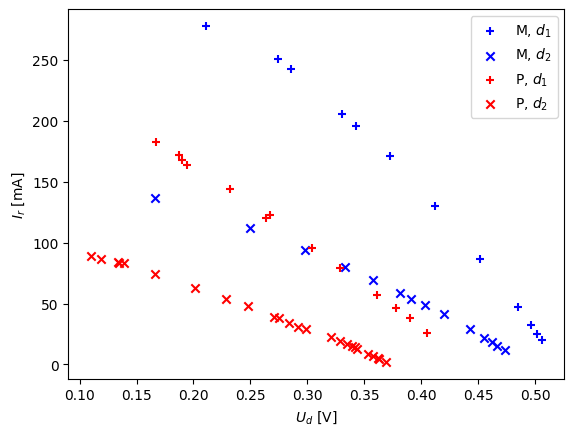

In [30]:
plt.scatter(monod40U, monod40I, marker="+", color=colors["M"], label="M, $d_1$")
plt.scatter(monod70U, monod70I, marker="x", color=colors["M"], label="M, $d_2$")

plt.scatter(polyd40U, polyd40I, marker='+', color=colors["P"], label="P, $d_1$")
plt.scatter(polyd70U, polyd70I, marker='x', color=colors["P"], label="P, $d_2$")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Polycristalline")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/Igamma(U),MP.tikz")

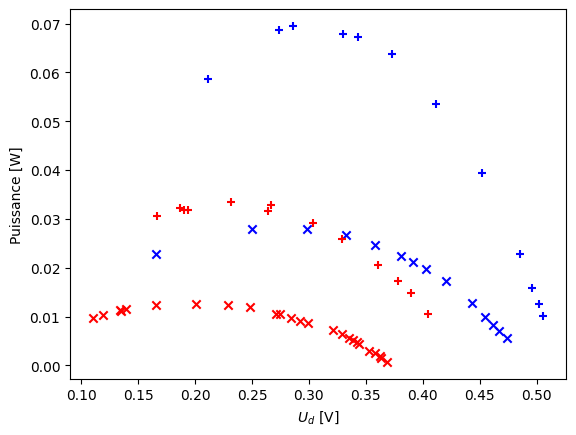

In [33]:
# Puissances
# [W] = [V] * [A]
puis_monod40 = monod40[:,1] * monod40[:,2] * 1e-3
delta_puis_monod40 = monod40I * 1e-3 * delta_monod40U + delta_monod40I * monod40U
puis_monod70 = monod70[:,1] * monod70[:,2] * 1e-3
delta_puis_monod70 = monod70I * 1e-3 * delta_monod70U + delta_monod70I * monod70U

plt.scatter(monod40U, puis_monod40, marker="+", color=colors["M"], label="M, $d_1$")
plt.scatter(monod70U, puis_monod70, marker="x", color=colors["M"], label="M, $d_2$")
# plt.title("$P(U_d)$, Cellule Monocristalline")

# Puissances
# [W] = [V] * [A]
puis_polyd40 = polyd40[:,1] * polyd40[:,2] * 1e-3
delta_puis_polyd40 = polyd40I * 1e-3 * delta_polyd40U + delta_polyd40I * polyd40U
puis_polyd70 = polyd70[:,1] * polyd70[:,2] * 1e-3
delta_puis_polyd70 = polyd70I * 1e-3 * delta_polyd70U + delta_polyd70I * polyd70U

plt.scatter(polyd40U, puis_polyd40, marker="+", color=colors["P"], label="P, $d_1$")
plt.scatter(polyd70U, puis_polyd70, marker="x", color=colors["P"], label="P, $d_2$")

plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/Puisssance(U),MP.tikz")

### Pmax

In [35]:
pmax_monod40_idx = np.argmax(puis_monod40)
print(puis_monod40, delta_puis_monod40)
print(f"Pmax mono d_1: {puis_monod40[pmax_monod40_idx]} +- {delta_puis_monod40[pmax_monod40_idx]} W")

[0.01012  0.01255  0.015872 0.022795 0.039324 0.05356  0.063783 0.069498
 0.06798  0.067228 0.068774 0.058658] [0.5062  0.50225 0.49632 0.48547 0.45287 0.4133  0.37471 0.28843 0.33206
 0.34496 0.27651 0.21378]
Pmax mono d_1: 0.06949799999999999 +- 0.28842999999999996 W
